## Support Vector Machine

- support vector들의 margin을 최대화하는 결정 경계
- g(x) = wx-b    /    w는 법선벡터
- 법선벡터의 최대화... 라그랑제 승수의 kkt조건으로 최적화 문제 해결

In [14]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

### make_blobs

Text(0.5, 0, '특성1')

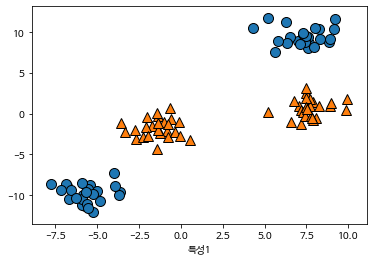

In [15]:
from sklearn.svm import LinearSVC
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=8)
#print(y)
y = y % 2
# 4클래스를 2가지로 줄임

mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성1")

0.66


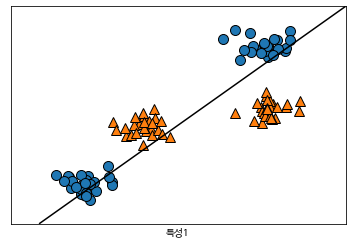

In [16]:
svm= LinearSVC(max_iter=100000, C=10).fit(X,y)
mglearn.plots.plot_2d_separator(svm,X)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성1")

print(svm.score(X,y))

일반 linearsvc로 예측.. 선 하나로 제대로 분류가 어려움

Text(0.5, 0, '특성1**2')

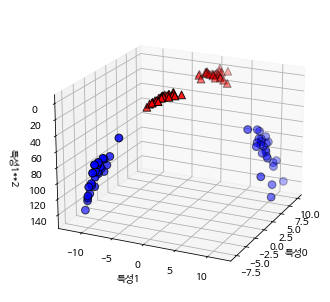

In [17]:
from mpl_toolkits.mplot3d import Axes3D, axes3d
#3d출력


svm= LinearSVC(max_iter=10000).fit(X,y)
#iteration 경고 나와서 추가해줌

X_new = np.hstack([X, X[:, 1:] ** 2])
#새로운 3번째 특성!
#2번 특성을 제곱하여 만들고 X를 새로 정의해줌
#특성이 3개라 3차원 가능
#hstack 수평합!!

figure = plt.figure()
ax = Axes3D(figure, elev=-160, azim=-25)
#화면상 돌리는 각도 설정 elev, azim

mask = y == 0
#클래스가 0이면 true 아니면 false

#mask를 사용해서 true인 것들만(클래스0) 출력
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')


#mask를 사용해서 false인 것들만(클래스1) 출력
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1**2")

3번째 특성으로 X[:, 1:] ** 2]를 추가해서 3d로 출력

(100, 3)
(3,)
(1,)
(50,)
(50, 50)


Text(0.5, 0, '특성 1**2')

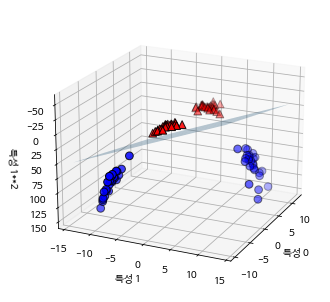

In [6]:
print(X_new.shape)

linear_svm_3d = LinearSVC(max_iter=100000).fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 특성별 coef와 intercept
print(coef.shape)
print(intercept.shape)
#선형이라서.. ridge, lasso처럼 절편은 하나, coef는 특성별로 나옴


figure = plt.figure()
ax = Axes3D(figure, elev=-160, azim=-25)

xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2,50)
# 0번 특성 최솟값 -2~ 최댓값 +2 까지 범위 생성

yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2,50)
# 1번 특성 최솟값 -2~ 최댓값 +2 까지 범위 생성

print(xx.shape)
XX, YY = np.meshgrid(xx,yy)
# nXn 형태로 만들어줌!
print(XX.shape)

ZZ = (coef[0]*XX +coef[1]*YY +intercept) / -coef[2] 
# 평면의 방정식
#2차원은 (coef[0]*X + intercept)/-coef[1]


ax.plot_surface(XX,YY,ZZ, rstride=8, cstride=8, alpha=0.3)
#표면 만들기.. cstride

ax.scatter(X_new[mask,0],X_new[mask,1], X_new[mask,2],c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask,0], X_new[~mask,1],X_new[~mask,2],c='r',marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 1**2")


#plot_surface
#cstride, rstride > 샘플 추출 간격
#여기선 큰 영향이 없는 것 같음
#https://pythonmania.tistory.com/10

평면을 이용해서 위처럼 분류 가능

[[ 0.13008438 -0.22027559 -0.05969491]]
1.0


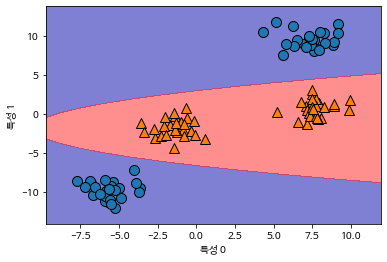

In [9]:
ZZ = YY**2
print(linear_svm_3d.coef_)


dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape), levels=[dec.min(),0,dec.max()],
            cmap=mglearn.cm2, alpha=0.5
            )
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

print(linear_svm_3d.score(X_new,y))


특성 추가 후 분류 모습! 클래스별로 잘 구분된 모습

추가전 점수  0.66 > 1.0

### make circles data

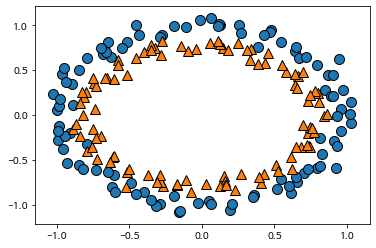

In [10]:
from sklearn.datasets import make_circles

#블로그 자료 참고하다가 circles라는 원형 데이터셋을 발견해서 사용해봄!
#https://blog.naver.com/meg2lee/222227300127


X,y = make_circles(n_samples=200, noise=0.05)

mglearn.discrete_scatter(X[:,0],X[:,1],y)

0.485


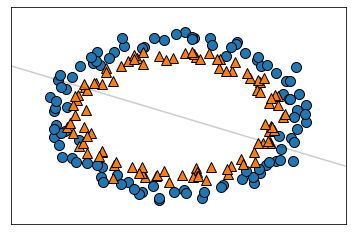

In [14]:
svm  = LinearSVC().fit(X,y)

mglearn.discrete_scatter(X[:,0],X[:,1],y)
mglearn.plots.plot_2d_separator(linear, X, fill=False, alpha=.2)


print(linear.score(X,y))
#데이터가 원형이라 평면 선형으로는 분류가 어려움

정확도가 0.48로 매우 낮음..

Text(0.5, 0, '특성 0**2 + 특성 1**2')

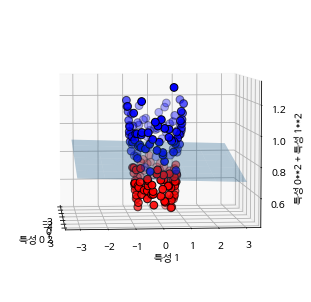

In [15]:
X_add = np.array([ i+j for i,j in zip((X[:,0]**2),(X[:, 1:] **2)) ])
X_new = np.hstack([X, X_add])

linear_svm_3d = LinearSVC(max_iter=100000).fit(X_new,y)

coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_


figure = plt.figure()
ax = Axes3D(figure, elev=5, azim=-5)
xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2,50)


XX, YY = np.meshgrid(xx,yy)
ZZ = (coef[0]*XX +coef[1]*YY +intercept) / -coef[2] 

ax.plot_surface(XX,YY,ZZ, rstride=8, cstride=8, alpha=0.3)

mask = y==0
ax.scatter(X_new[mask,0],X_new[mask,1], X_new[mask,2],c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1], X_new[~mask,2],c='r', s=60, edgecolor='k')

ax.set_xlabel("특성 0")
ax.set_ylabel("특성 1")
ax.set_zlabel("특성 0**2 + 특성 1**2")

원형이라서 새 특성으로 X**2 + y**2 을 사용함  = r**2!!

중심으로부터 떨어진 거리 > 내부원과 외부원이라서 원의 반지름으로 나눌 수 있음

잘 나뉜 것을 확인할 수 있다

[[-0.12763191 -0.02602894 -4.85370114]]
 특성 추가 전 :  0.485
X**2 + Y**2 추가 후 :  0.97


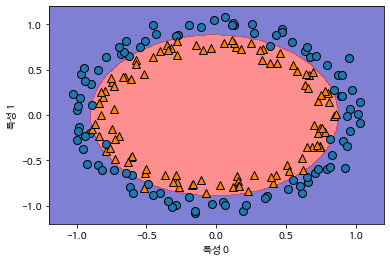

In [16]:
ZZ = XX**2+YY**2
print(linear_svm_3d.coef_)


dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape), levels=[dec.min(),0,dec.max()],
            cmap=mglearn.cm2, alpha=0.5
            )

mglearn.discrete_scatter(X[:,0],X[:,1],y, s=8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
## ☆

print(" 특성 추가 전 : ",svm.score(X,y))
print("X**2 + Y**2 추가 후 : ",linear_svm_3d.score(X_new,y))

0.485 > 0.98로 특성 추가 후 확실히 성능이 개선됐음

### Iris Data

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


Text(0, 0.5, 'petal width (cm)')

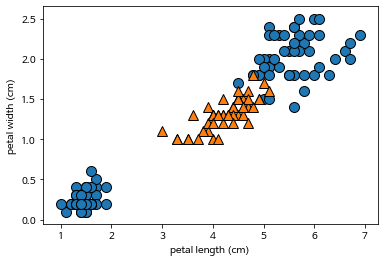

In [18]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.feature_names)
print(iris.target_names)

X = iris.data[:,2:] # petal length와 petal width
y = (iris.target==1).astype(np.int) # class virginica Yes or No
mglearn.discrete_scatter(X[:,0], X[:,1],y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

petal length, width로 virginica인지 아닌지 분류

0.6133333333333333


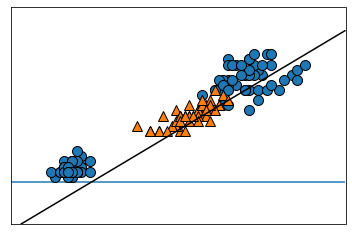

In [20]:
svm = LinearSVC().fit(X,y)
mglearn.plots.plot_2d_separator(svm, X)
plt.hlines(0, plt.xlim()[0], plt.xlim()[1])
mglearn.discrete_scatter(X[:,0], X[:,1], y)
print(svm.score(X,y))

정확도가 0.61


추가 특성으로


y축 값으로 주황색 클래스가 사이에 끼어있어서 앞에서 **2을 새 특성으로 한 것처럼 사이 거리를 이용

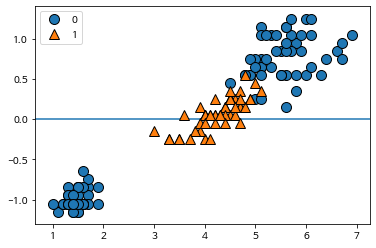

In [21]:
svm = LinearSVC().fit(X,y)
mglearn.discrete_scatter(X[:,0], X[:,1]-1.25, y)
plt.hlines(0, plt.xlim()[0], plt.xlim()[1])
plt.legend()

y에서 1.25를 빼서 0으로 축을 맞춰줌

Text(0.5, 0, 'petal width (cm)')

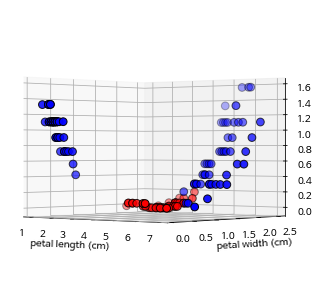

In [22]:
X_new = np.hstack([X, (X[:,1:]-1.25)**2])
#새 특성으로 1번 특성에서 변형함


linear_svm_3d = LinearSVC(max_iter=100000).fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_


figure = plt.figure()
ax = Axes3D(figure, elev=-0, azim=-50)

xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2,50)

ZZ = (coef[0]*XX +coef[1]*YY +intercept) / -coef[2] 

XX, YY = np.meshgrid(xx,yy)
mask = y==0
ax.scatter(X_new[mask,0],X_new[mask,1], X_new[mask,2],c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1], X_new[~mask,2],c='r', s=60, edgecolor='k')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

위와 같이 포물선 형태로 데이터가 나뉘어짐

아래 빨간 것들이 virginica

Text(0.5, 0, 'petal width (cm)')

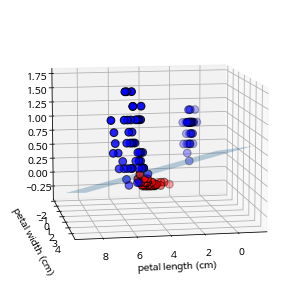

In [23]:
X_new = np.hstack([X, (X[:,1:]-1.2)**2])

linear_svm_3d = LinearSVC(max_iter=100000).fit(X_new,y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_


figure = plt.figure()
ax = Axes3D(figure, elev=10, azim=80)

xx = np.linspace(X_new[:,0].min()-2, X_new[:,0].max()+2,50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:,1].max()+2,50)

ZZ = (coef[0]*XX +coef[1]*YY +intercept) / -coef[2] 

XX, YY = np.meshgrid(xx,yy)

ax.plot_surface(XX,YY,ZZ, rstride=8, cstride=8, alpha=0.3)


mask = y==0
ax.scatter(X_new[mask,0],X_new[mask,1], X_new[mask,2],c='b', s=60, edgecolor='k')
ax.scatter(X_new[~mask,0],X_new[~mask,1], X_new[~mask,2],c='r', s=60, edgecolor='k')

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

(50, 50)
 특성 추가 전 :  0.6133333333333333
(Y-1.25)**2 추가 후 :  0.9466666666666667


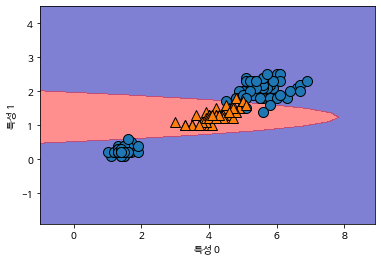

In [24]:
ZZ = (YY-1.2)**2
print(XX.shape)
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX,YY,dec.reshape(XX.shape), levels=[dec.min(),0,dec.max()],
            cmap=mglearn.cm2, alpha=0.5
            )
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

## ☆

print(" 특성 추가 전 : ",svm.score(X,y))
print("(Y-1.25)**2 추가 후 : ",linear_svm_3d.score(X_new,y))

iris 데이터 역시 새로운 특성 추가 후 성능이 0.6 > 0.9로 개선됨

# SVC

- C 규제변수 >> 로지스틱처럼 크면 제약이 커짐
- kernel 'rgf', 'sigmoid', 'poly'...
- gamma - kernel coefficient/ 커널폭의 역수

### 커널 트릭?

- 매핑함수에서  내적을 대체해서 커널 함수를 만들고 연산을 줄임
- 다항 커널, rbf-가우시안 커널, 시그모이드 커널

Text(0, 0.5, '특성 1')

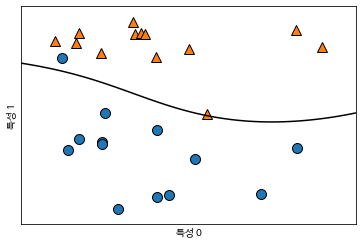

In [18]:
from sklearn.svm import SVC

X,y = mglearn.tools.make_handcrafted_dataset()
#클래스 2/ 특성 2

svm = SVC(kernel='rbf', C=10, gamma = 0.1).fit(X,y)
#모델 생성 및 훈련

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")


서포트 벡터의 수 = 5
[-10.          -6.25178295  -3.73381586  10.           9.98559881]
[False False False  True  True]


Text(0, 0.5, '특성 1')

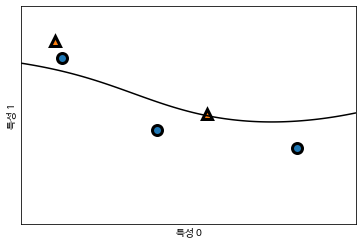

In [26]:
sv = svm.support_vectors_
#svm 모델의 서포트 벡터 가져옴
print("서포트 벡터의 수 = {}".format(sv.shape[0]))

sv_labels = svm.dual_coef_.ravel() > 0 
#dual_coef_는 [[...]]형태. ravel로 [...]로 변환
#[0]도 가능

print(svm.dual_coef_[0])
print(svm.dual_coef_[0]>0)
# 기준선 아래/위로 나눠서 클래스를 나눔

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=10, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

#markeredgewidth = 마커의 테두리 너비

- support_vectors_  = 서포트 벡터들의 위치가 들어있음
- dual_coef_ = 서포트 벡터에 따른 coef값으로 0이상이면 1 미만이면 0이다 // 기준 아래, 위

(3, 3)


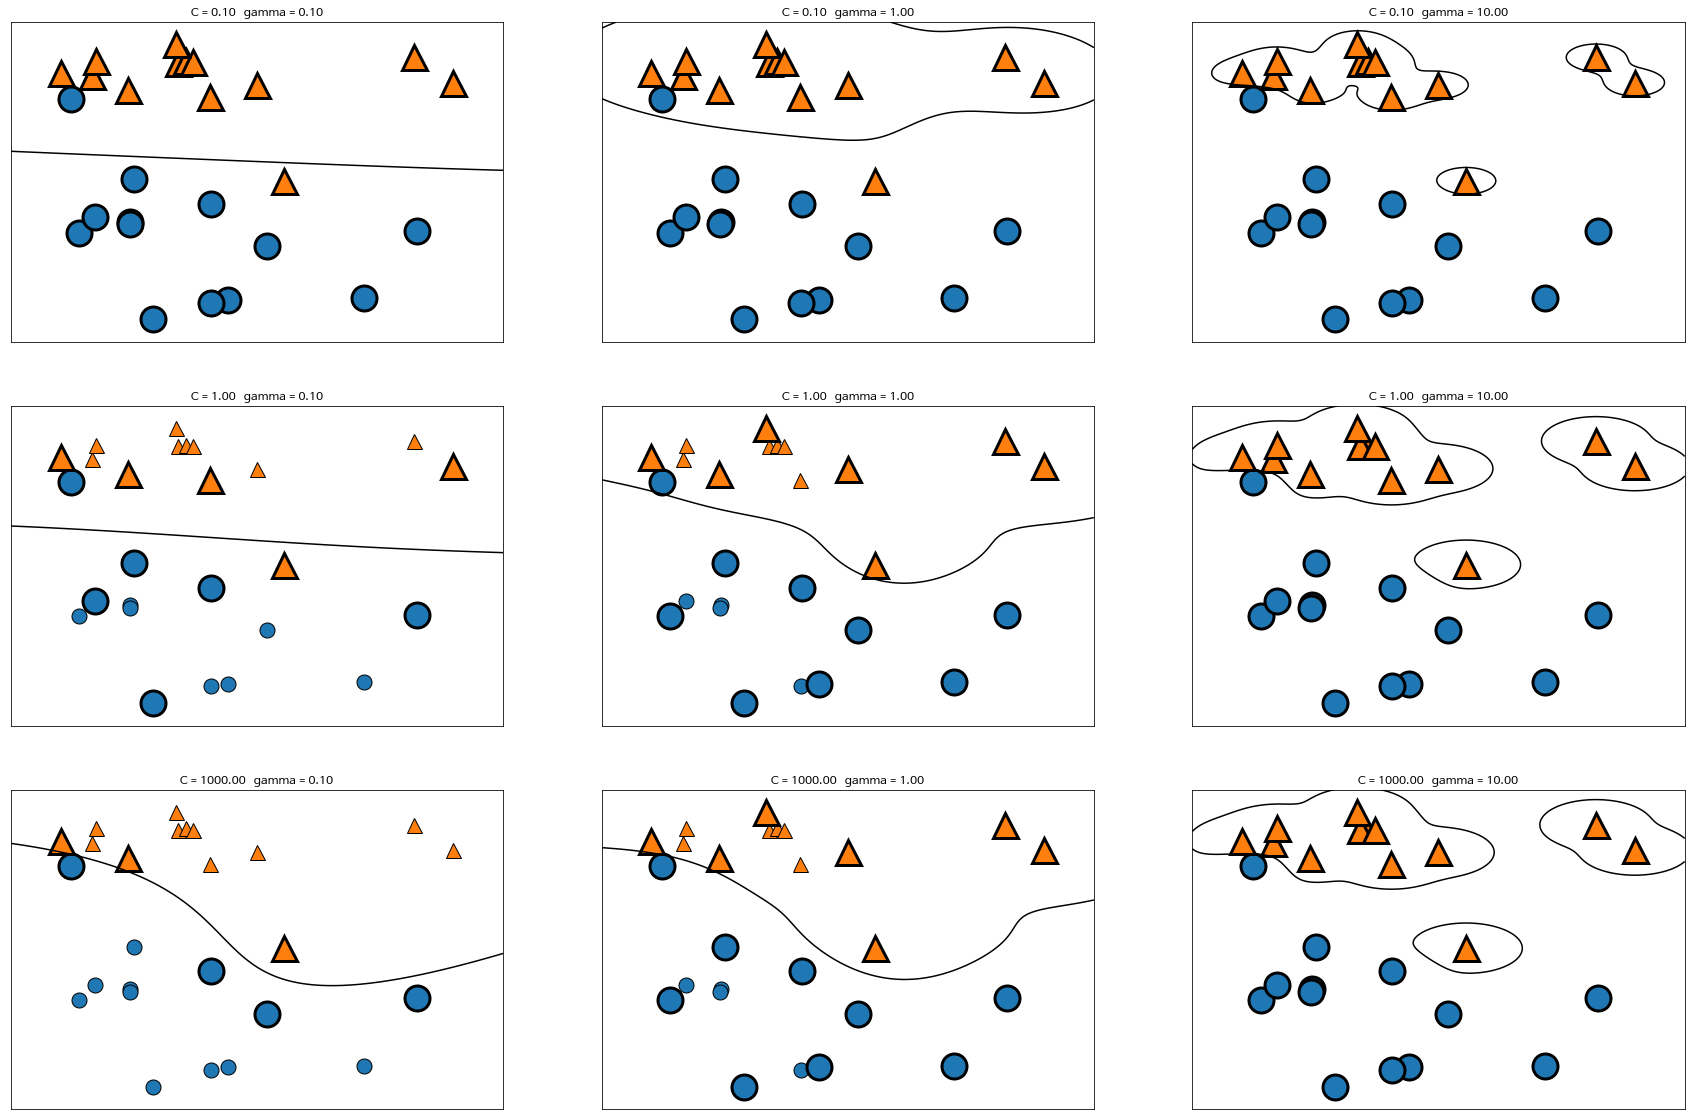

In [27]:
fig, axes = plt.subplots(3,3,figsize=(30,20))

print(axes.shape)
C = [0.1,1,1000]
G = [0.1,1,10]
index=0
axes = axes.ravel()

for c in C:
    for g in G:
        ax = axes[index]
        index=index+1
        ax.set_title("C = {:.2f}   gamma = {:.2f}".format(c,g))
        svm = SVC(gamma=g, C = c).fit(X,y)
        sv = svm.support_vectors_
        sv_labels = svm.dual_coef_.ravel() > 0 
        mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax, s=15)
        mglearn.plots.plot_2d_separator(svm, X, eps=.5, ax=ax)
        mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=25, markeredgewidth=3,ax=ax)


### C 규제변수와 Gamma의 변화

- gamma가 커질수록 과대적합/ 특정 포인트에 민감/복잡 모델
- gamma가 작을수록 / 다수의 포인트를 고려함


- c가 inverse해서 패널티 줌 / 커지면 과대적합
- c가 작아지면 각 포인트 영향력이 작아짐/ 과소적합


Text(0.5, 1.0, "kernel = 'poly'")

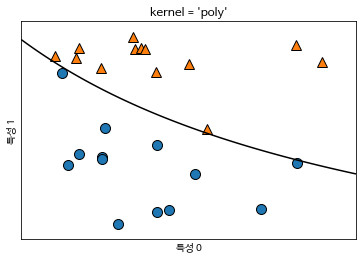

In [28]:
svm = SVC(kernel='poly', C=10, gamma = 0.1).fit(X,y)
#모델 생성 및 훈련

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.title("kernel = 'poly'")

Text(0.5, 1.0, "kernel = 'Sigmoid'")

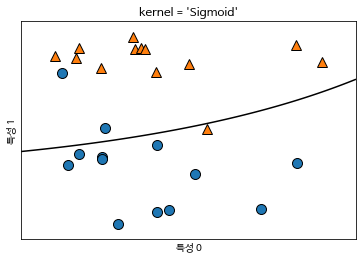

In [29]:
svm = SVC(kernel='sigmoid', C=1, gamma = 0.01).fit(X,y)
#모델 생성 및 훈련

mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.title("kernel = 'Sigmoid'")

### 커널들  rbf, poly, sigmoid

- poly - rbf와 sigmoid보다 유사하다


- sigmoid - 다른 커널과 비슷한 결과를 내려면 gamma 값이 더 작아야하고(다수 포인트 고려)
  C값도 더 작아야 한다.(규제를 느슨하게)
  
  
- 시그모이드가 비교적 같은 C와 gamma값에서 과대적합되고 특정포인트에 민감하다는 것을 알 수 있음

### make circles

0.98


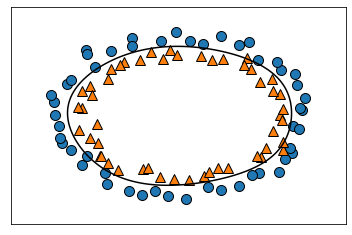

In [30]:
X,y = make_circles(n_samples=100, noise=0.05)

mglearn.discrete_scatter(X[:,0],X[:,1],y)

svm = SVC(C=10, ).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, fill=False)
print(svm.score(X,y))

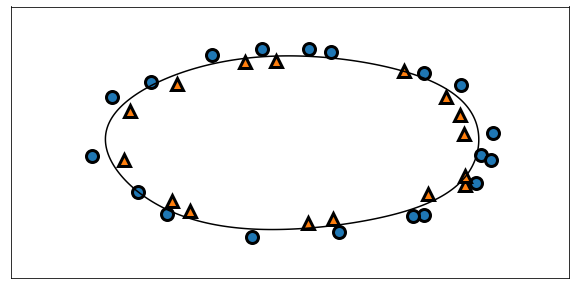

In [31]:
sv = svm.support_vectors_

sv_labels = svm.dual_coef_.ravel() > 0

plt.figure(figsize=(10,5))
mglearn.discrete_scatter(sv[:,0], sv[:,1], sv_labels, s=12, markeredgewidth=3)
mglearn.plots.plot_2d_separator(svm, X, fill=False)

#circle data의 서포트 벡터들

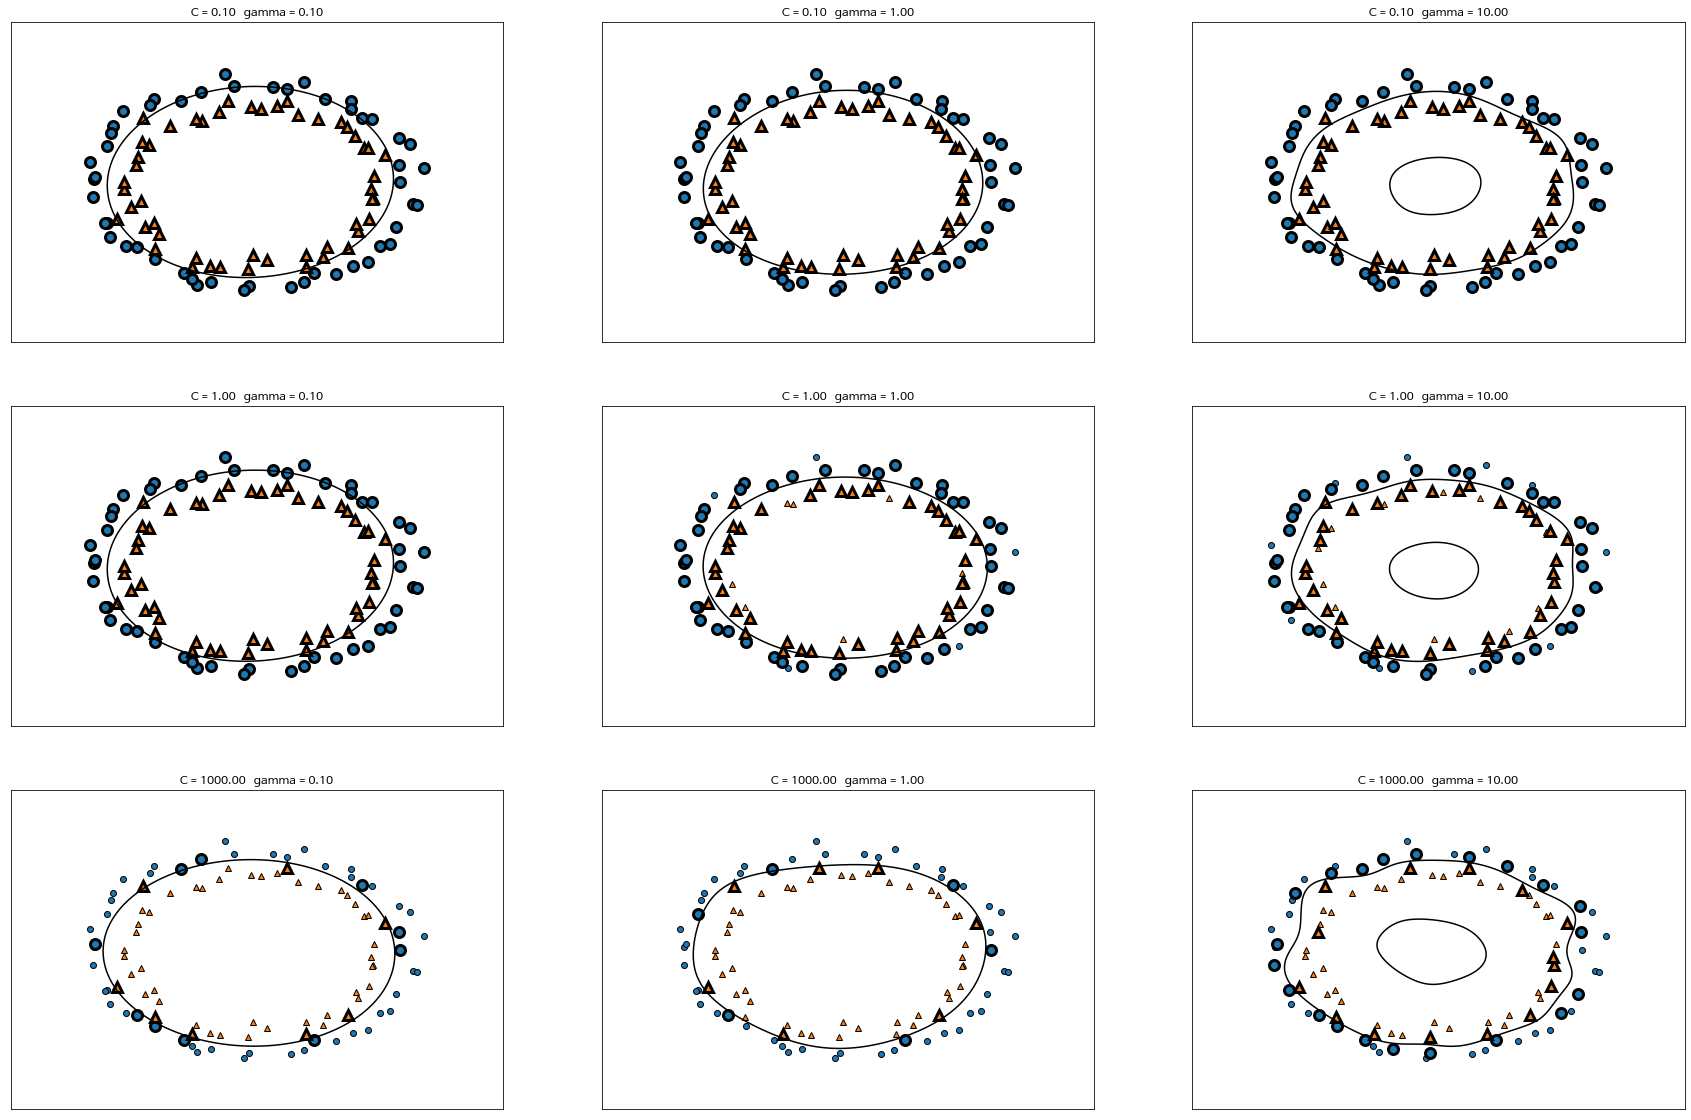

In [231]:
fig, axes = plt.subplots(3,3,figsize=(30,20))

C = [0.1,1,1000]
G = [0.1,1,10]
index=0
axes = axes.ravel()

for c in C:
    for g in G:
        ax = axes[index]
        index=index+1
        ax.set_title("C = {:.2f}   gamma = {:.2f}".format(c,g))
        svm = SVC(gamma=g, C = c).fit(X,y)
        sv = svm.support_vectors_
        sv_labels = svm.dual_coef_.ravel() > 0 
        mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax, s=6)
        mglearn.plots.plot_2d_separator(svm, X, eps=.5, ax=ax)
        mglearn.discrete_scatter(sv[:,0],sv[:,1],sv_labels,s=10, markeredgewidth=3,ax=ax)


In [232]:
svm = SVC().fit(X,y)
print(" score : ",svm.score(X,y))

for c in C:
    for g in G:
        svm = SVC(gamma=g, C = c).fit(X,y)
        print("C = {:.2f}   gamma = {:.2f}   score = {:.3f}".format(c,g, svm.score(X,y)))

 score :  0.96
C = 0.10   gamma = 0.10   score = 0.960
C = 0.10   gamma = 1.00   score = 0.970
C = 0.10   gamma = 10.00   score = 0.960
C = 1.00   gamma = 0.10   score = 0.960
C = 1.00   gamma = 1.00   score = 0.960
C = 1.00   gamma = 10.00   score = 0.970
C = 1000.00   gamma = 0.10   score = 0.990
C = 1000.00   gamma = 1.00   score = 1.000
C = 1000.00   gamma = 10.00   score = 1.000


규제가 약화된 1000의 경우는 과대적합된 결과  각 포인트의 영향력이 커짐..

기본값에서부터 결과가 좋아서 C나 gamma에 따른 큰 변화는 없는 것으로 보인다....

### iris Data -- petal length, petal width

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


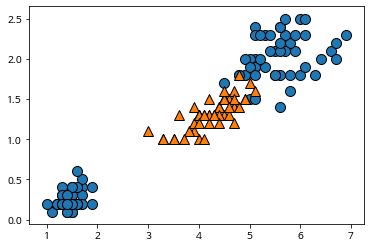

In [19]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.feature_names)
print(iris.target_names)

X = iris.data[:,2:] # petal length와 petal width
y = (iris.target==1).astype(np.int) # class virginica Yes or No
mglearn.discrete_scatter(X[:,0], X[:,1],y)

0.9533333333333334


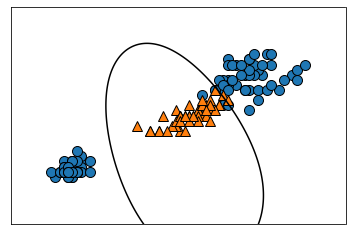

In [37]:
svm = SVC().fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, fill=False)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
print(svm.score(X,y))

SVC로 virginica/nonvirginica에 대해 테스트한 결과

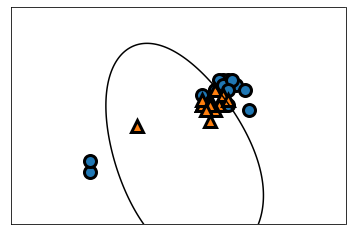

In [42]:
sub = svm.support_vectors_
label = svm.dual_coef_
label = label.ravel()>0

mglearn.discrete_scatter(sub[:,0], sub[:,1], label, s= 12, markeredgewidth=3)
mglearn.plots.plot_2d_separator(svm, X, fill=False)

#그 서포트벡터들

## svc와 linearsvc

svc = 0.95

LinearSVC (특성 추가 전) = 0.61

LinearSVC (특성 추가 후) = 0.94

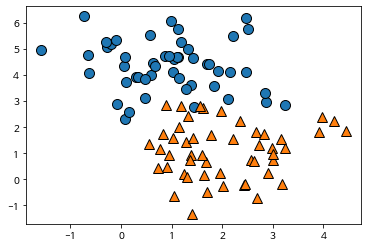

In [20]:
X, y = make_blobs(centers=2, random_state=0)
mglearn.discrete_scatter(X[:,0], X[:,1],y)

SVC =  0.96
LinearSVC =  0.94


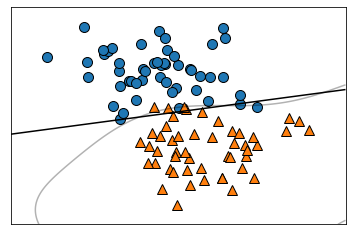

In [26]:
svm = SVC().fit(X,y)
linear_svm = LinearSVC().fit(X,y)
mglearn.discrete_scatter(X[:,0], X[:,1],y)
mglearn.plots.plot_2d_separator(svm,X,alpha=.3)
mglearn.plots.plot_2d_separator(linear_svm,X, alpha=1)

print("SVC = ", svm.score(X,y))
print("LinearSVC = ", linear_svm.score(X,y))


굵은선이 Linear_SVC , 연한선이 SVC임

- 위 처럼 선형으로 분류가 될만한 것은 둘 다 성능이 비슷하지만


- iris나 원형처럼 복잡한 데이터의 경우는 특성을 추가하지 않는 상태에선 SVC의 성능이 더 좋음
- 추가 후는 역시 비슷한 정확도가 산출됨

### cancer데이터

In [28]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,                                                  
                                                    random_state=0)

In [29]:
svm = SVC(gamma='auto').fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(svm.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(svm.score(X_test, y_test)))

# 오히려 훈련 세트의 정확도가 떨어진다... ??
# QNA보고 gamma값 변경함 >> 예제는 gamma가 auto 즉 1/n_features로 설정됨. 기본은 scale로 1 / (n_features * X.var())임
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.629


Text(0, 0.5, '특성 크기')

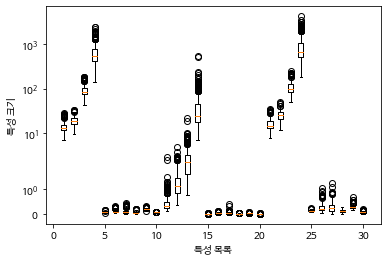

In [30]:
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("특성 목록")
plt.ylabel("특성 크기")


결정트리는 각각의 특성을 보는 반면 svc는 각각의 샘플을 보기 때문에 데이터 전처리가 필요함

In [31]:
#훈련 세트에서 특성별 최소값 계산
min_on_training = X_train.min(axis=0)

#훈련 세트에서 특성별 (최대값-최소값)
range_on_training = (X_train-min_on_training).max(axis=0)

# 데이터에 최소값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값 0 최댓값 1
X_train_scaled = (X_train-min_on_training) / range_on_training
X_test_scaled = (X_test-min_on_training) / range_on_training

svc = SVC(gamma='auto') 
svc.fit(X_train_scaled,y_train)
print("훈련 세트 정확도 {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도 {:.3f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 정확도 0.948
테스트 세트 정확도 0.951


데이터를 스케일링해서 과적합 방지함

In [38]:
svc = SVC(C=1000,gamma='auto') 
svc.fit(X_train_scaled,y_train)
print("훈련 세트 정확도 {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도 {:.3f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 정확도 0.988
테스트 세트 정확도 0.972


In [33]:
svc = SVC(C=0.1,gamma='auto') 
svc.fit(X_train_scaled,y_train)
print("훈련 세트 정확도 {:.3f}".format(svc.score(X_train_scaled,y_train)))
print("테스트 세트 정확도 {:.3f}".format(svc.score(X_test_scaled,y_test)))

훈련 세트 정확도 0.732
테스트 세트 정확도 0.727


큰 C값을 주어서 규제를 완화시켰더니 세트 점수가 오름..

반대로 C를 줄여 규제를 강화하니 과소적합된 결과(각 포인트의 영향력이 작아짐)

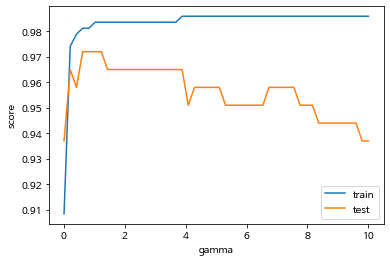

In [44]:

G = np.linspace(0.01,10)
score=[]


for g in G:
    svc = SVC(gamma=g, C=1, kernel='rbf').fit(X_train_scaled,y_train)
    score.append([svc.score(X_train_scaled,y_train), svc.score(X_test_scaled,y_test)])

score=np.array(score)
plt.plot(G,score[:,0],label='train')
plt.plot(G,score[:,1],label='test')
plt.xlabel("gamma")
plt.ylabel("score")
plt.legend()

gamma가 커질수록 과대적합! 특정포인트에 민감해져서 결국 1이 된다

반대로 테스트 데이터는 과적합 영향으로 정확도가 떨어지는 것을 확인할 수 있다.